In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression

In [33]:
df = pd.read_csv("Telco_Customer_Churn_Dataset (3).csv")

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df_raw = df.copy()
df_raw.replace(" ", np.nan, inplace=True)
df_raw.dropna(inplace=True)

In [36]:
df_eda = df.copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [39]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
df.drop("customerID", axis=1, inplace=True)

In [41]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(subset=["TotalCharges"], inplace=True)

In [42]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [43]:
le = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [44]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train features shape: (5625, 30)
Test features shape: (1407, 30)
Train target shape: (5625,)
Test target shape: (1407,)


In [47]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\Ughur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [48]:
churn_rate = df["Churn"].mean()
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 26.58%


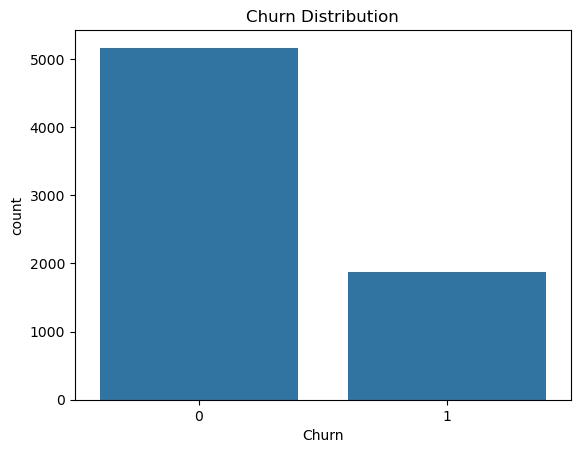

In [49]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


Churn by gender (%):
 Churn       0      1
gender              
0       73.04  26.96
1       73.80  26.20


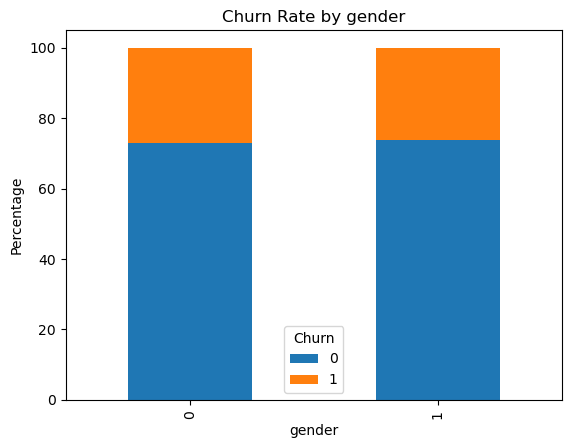


Churn by Partner (%):
 Churn        0      1
Partner              
0        67.02  32.98
1        80.28  19.72


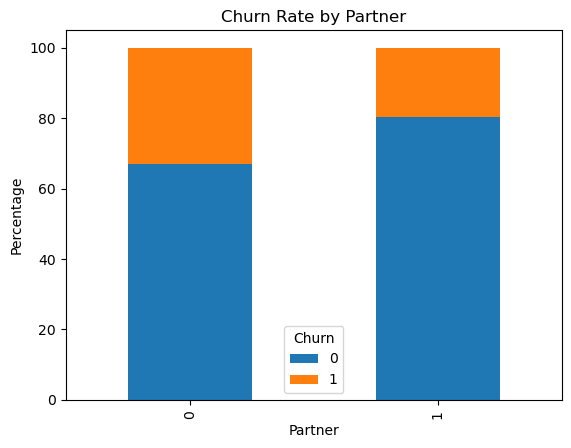


Churn by Dependents (%):
 Churn           0      1
Dependents              
0           68.72  31.28
1           84.47  15.53


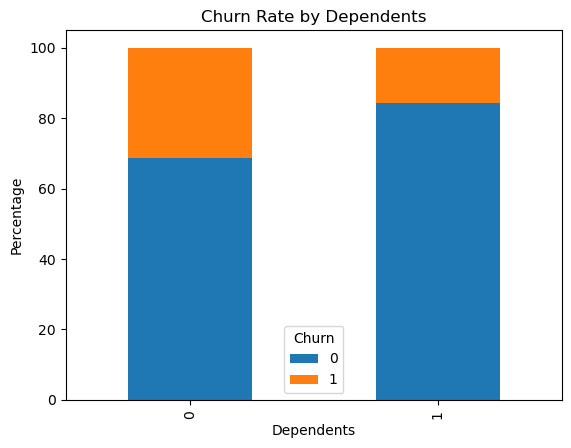

In [50]:
for col in ["gender", "Partner", "Dependents"]:
    churn_by_col = pd.crosstab(df[col], df["Churn"], normalize='index') * 100
    print(f"\nChurn by {col} (%):\n", churn_by_col.round(2))
    churn_by_col.plot(kind="bar", stacked=True)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Percentage")
    plt.show()

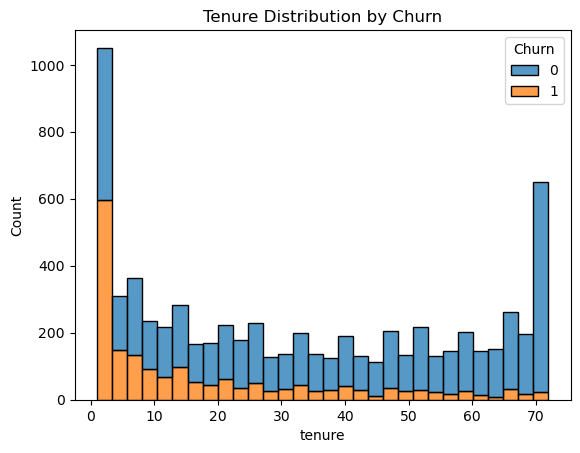

In [51]:
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Tenure Distribution by Churn")
plt.show()


Churn by Contract Type (%):
 Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


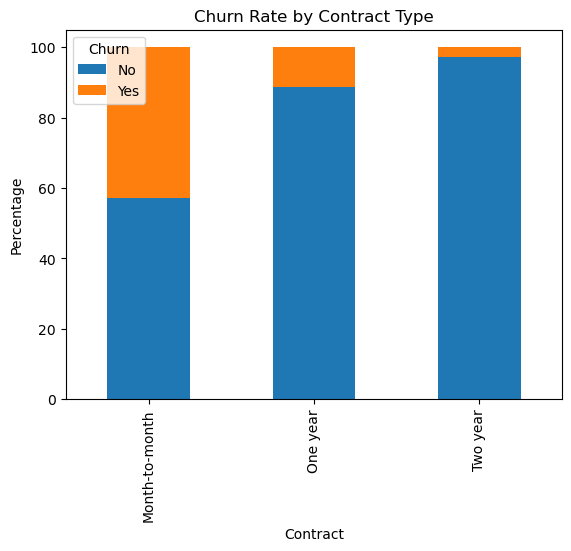

In [52]:
contract_churn = pd.crosstab(df_eda["Contract"], df_eda["Churn"], normalize='index') * 100
print("\nChurn by Contract Type (%):\n", contract_churn.round(2))
contract_churn.plot(kind="bar", stacked=True)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Percentage")
plt.show()


Churn by Payment Method (%):
 Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


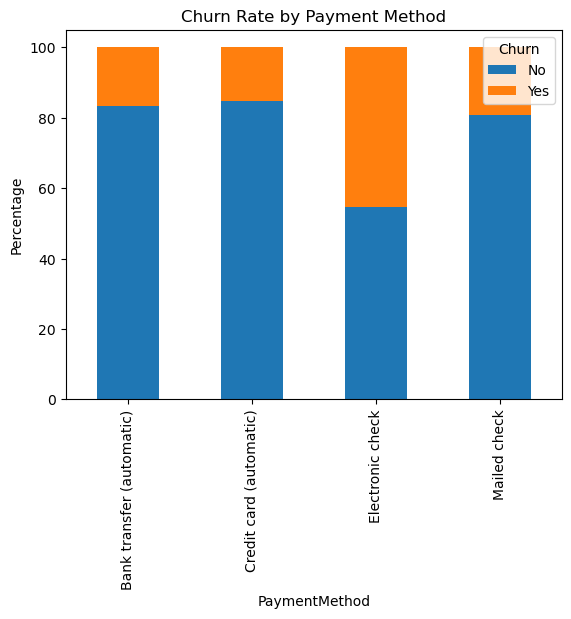

In [53]:
payment_churn = pd.crosstab(df_eda["PaymentMethod"], df_eda["Churn"], normalize='index') * 100
print("\nChurn by Payment Method (%):\n", payment_churn.round(2))
payment_churn.plot(kind="bar", stacked=True)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Percentage")
plt.show()

In [54]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
             gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   7032.000000       7032.000000     7032.000000   7032.000000   
mean       0.903299          0.592719       64.798208   2283.300441   
std        0.295571          0.491363       30.085974   2266.771362   
min      

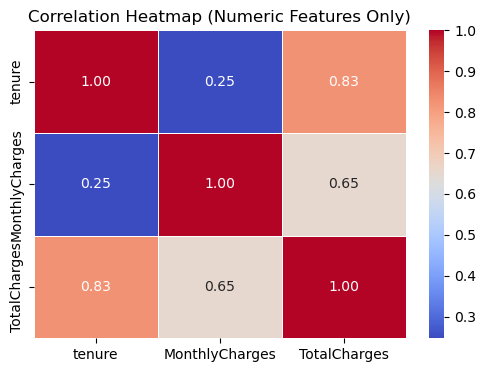

In [55]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [56]:
correlation = df.corr()['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
print(correlation.round(2))

tenure                                  -0.35
InternetService_Fiber optic              0.31
Contract_Two year                       -0.30
PaymentMethod_Electronic check           0.30
StreamingTV_No internet service         -0.23
TechSupport_No internet service         -0.23
StreamingMovies_No internet service     -0.23
DeviceProtection_No internet service    -0.23
OnlineSecurity_No internet service      -0.23
InternetService_No                      -0.23
OnlineBackup_No internet service        -0.23
TotalCharges                            -0.20
MonthlyCharges                           0.19
PaperlessBilling                         0.19
Contract_One year                       -0.18
OnlineSecurity_Yes                      -0.17
TechSupport_Yes                         -0.16
Dependents                              -0.16
SeniorCitizen                            0.15
Partner                                 -0.15
PaymentMethod_Credit card (automatic)   -0.13
PaymentMethod_Mailed check        

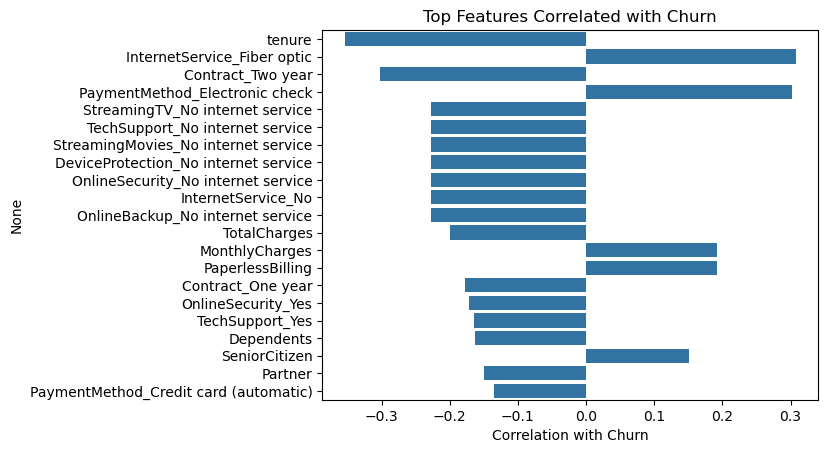

In [57]:
top_corr = correlation[abs(correlation) > 0.1] 
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top Features Correlated with Churn")
plt.xlabel("Correlation with Churn")
plt.show()


Accuracy: 0.8031272210376688
Precision: 0.6456456456456456
Recall: 0.5748663101604278
F1 Score: 0.6082036775106082
ROC AUC: 0.8363690719621475

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



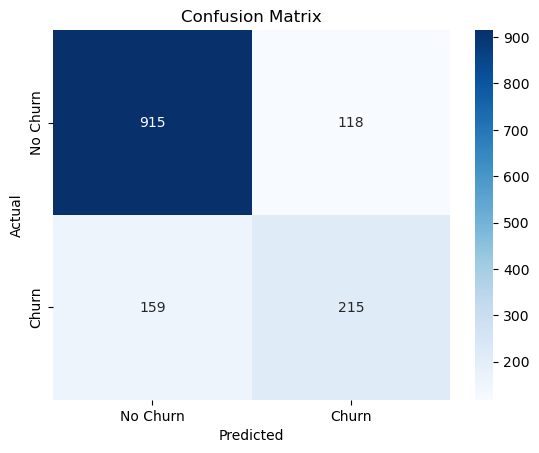

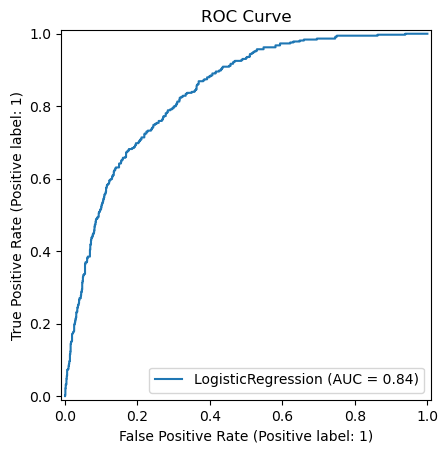

In [58]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [59]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(predictions_df.head())

      Actual  Predicted
974        0          0
619        0          1
4289       0          0
3721       1          0
4533       0          0


In [60]:
print("Predictions for Churned Customers:")
print(predictions_df[predictions_df['Actual'] == 1].head())  

print("\nPredictions for Non-Churned Customers:")
print(predictions_df[predictions_df['Actual'] == 0].head()) 

Predictions for Churned Customers:
      Actual  Predicted
3721       1          0
445        1          0
1346       1          1
4653       1          0
346        1          1

Predictions for Non-Churned Customers:
      Actual  Predicted
974        0          0
619        0          1
4289       0          0
4533       0          0
5898       0          0


In [61]:
predictions_df['Churn Probability'] = model.predict_proba(X_test)[:, 1]

print(predictions_df.head())

      Actual  Predicted  Churn Probability
974        0          0           0.017974
619        0          1           0.585401
4289       0          0           0.004605
3721       1          0           0.203692
4533       0          0           0.105789


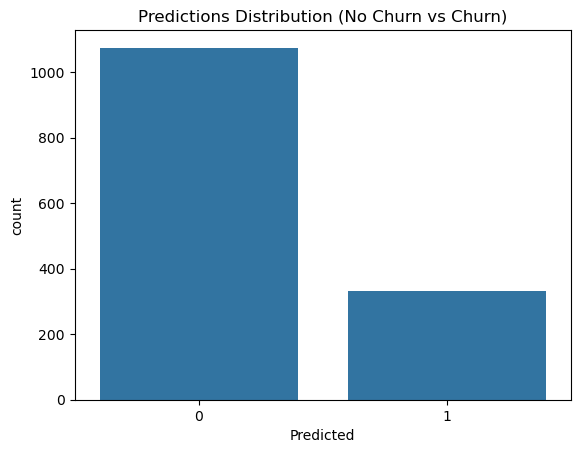

In [62]:
sns.countplot(x='Predicted', data=predictions_df)
plt.title("Predictions Distribution (No Churn vs Churn)")
plt.show()